# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date

# Import API key
from api_keys import ow_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Today's Date
today = date.today()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url = 'https://api.openweathermap.org/data/2.5/weather'
# query_url = f'{url}?q={cities[0]}&units=imperial&appid={ow_key}'

# response = requests.get(query_url).json()

# pprint(response['name'])


In [4]:
print('Beginning Data Retrieval')
print('------------------------')

name = []
lat = []
lng = []
max_temp = []
humid = []
clouds = []
wind = []
country = []
date = []

# Loop through cities collecting weather data for each city
for i, city in enumerate(cities):
    
    print(f'Processing record {i+1}: {city}')
    
    time.sleep(1)
   
    # Declare query url
    url = 'https://api.openweathermap.org/data/2.5/weather'
    query_url = f'{url}?q={city}&units=imperial&appid={ow_key}'

    response = requests.get(query_url).json()

    try:
        
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

    except:

        print(f'Skipping {city}: No data available')
        
print('------------------------')
print('Data Retrevial Complete')
print('------------------------')
    

Beginning Data Retrieval
------------------------
Processing record 1: chernyshevskiy
Processing record 2: taolanaro
Skipping taolanaro: No data available
Processing record 3: ushuaia
Processing record 4: paris
Processing record 5: andenes
Processing record 6: rawson
Processing record 7: rikitea
Processing record 8: barrow
Processing record 9: punta arenas
Processing record 10: qeshm
Processing record 11: saint anthony
Processing record 12: pisco
Processing record 13: tuatapere
Processing record 14: tateyama
Processing record 15: saint-philippe
Processing record 16: ambulu
Processing record 17: barbar
Skipping barbar: No data available
Processing record 18: tuktoyaktuk
Processing record 19: gornopravdinsk
Processing record 20: hermanus
Processing record 21: san patricio
Processing record 22: podgornoye
Processing record 23: atuona
Processing record 24: nizhneyansk
Skipping nizhneyansk: No data available
Processing record 25: puerto ayora
Processing record 26: bethel
Processing record 2

Processing record 227: muroto
Processing record 228: yar-sale
Processing record 229: husavik
Processing record 230: samokov
Processing record 231: sydney
Processing record 232: getulio vargas
Processing record 233: makhinjauri
Processing record 234: nanjing
Processing record 235: aksha
Processing record 236: bathsheba
Processing record 237: palmer
Processing record 238: krutinka
Processing record 239: ampanihy
Processing record 240: fukue
Processing record 241: bur gabo
Skipping bur gabo: No data available
Processing record 242: hamilton
Processing record 243: cedar rapids
Processing record 244: quatre cocos
Processing record 245: virginia beach
Processing record 246: hithadhoo
Processing record 247: yerbogachen
Processing record 248: fortuna
Processing record 249: rabo de peixe
Processing record 250: rio grande
Processing record 251: saint-augustin
Processing record 252: skagastrond
Skipping skagastrond: No data available
Processing record 253: pogranichnyy
Processing record 254: moch

Processing record 458: kjopsvik
Processing record 459: boguchany
Processing record 460: nguiu
Skipping nguiu: No data available
Processing record 461: bolungarvik
Skipping bolungarvik: No data available
Processing record 462: saint-francois
Processing record 463: okhotsk
Processing record 464: port hardy
Processing record 465: sucua
Processing record 466: moose factory
Processing record 467: mount gambier
Processing record 468: osmena
Processing record 469: coruripe
Processing record 470: palabuhanratu
Skipping palabuhanratu: No data available
Processing record 471: san cristobal
Processing record 472: vila franca do campo
Processing record 473: yingzhong
Skipping yingzhong: No data available
Processing record 474: iwanai
Processing record 475: san marcos
Processing record 476: kenai
Processing record 477: cozumel
Processing record 478: marsaxlokk
Processing record 479: morondava
Processing record 480: cidreira
Processing record 481: peniche
Processing record 482: charters towers
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame({'City': name,
                        'Latitude': lat,
                        'Longitude': lng,
                        'Max Temp': max_temp,
                        'Humidity': humid,
                        'Cloudiness': clouds,
                        'Wind Speed': wind,
                        'Country': country,
                        'Date': date})

city_df.to_csv(output_data_file)

city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chernyshevskiy,63.01,112.47,8.78,89,100,11.23,RU,1603947116
1,Ushuaia,-54.80,-68.30,42.80,87,90,27.51,AR,1603947052
2,Paris,48.85,2.35,52.00,87,75,9.17,FR,1603946544
3,Andenes,69.31,16.12,39.20,100,75,19.46,NO,1603947123
4,Rawson,-43.30,-65.10,47.35,52,0,7.67,AR,1603947124


In [7]:
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,21.403678,13.936141,56.918098,73.952899,48.420290,7.526558,1.603948e+09
std,33.862018,92.473683,22.332374,20.418879,39.436422,5.296778,2.843847e+02
min,-54.800000,-175.200000,-6.020000,5.000000,0.000000,0.160000,1.603947e+09
25%,-6.985000,-68.375000,41.000000,63.000000,1.000000,3.360000,1.603947e+09
50%,29.345000,18.270000,60.010000,80.000000,43.000000,6.260000,1.603948e+09
75%,50.207500,101.215000,75.375000,90.000000,90.000000,10.290000,1.603948e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,28.860000,1.603948e+09


## Inspect the data and remove the cities where the humidity > 95%.
----


In [8]:
#  Get the indices of cities that have humidity over 95%.
high_humid = [i for i, row in city_df.iterrows() if row['Humidity'] > 95]

print(high_humid)


# for i, row in city_df.iterrows():
#     if row['Humidity'] > 100:
#         print(i)

[3, 16, 38, 102, 108, 116, 117, 124, 132, 138, 151, 152, 190, 195, 213, 217, 251, 259, 269, 295, 301, 314, 327, 339, 341, 346, 354, 367, 384, 396, 406, 407, 413, 420, 429, 440, 445, 466, 502, 506, 507, 521]


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(high_humid)
city_df.head()
clean_city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,5.100000e+02
mean,20.792725,17.138490,57.29900,71.909804,46.237255,7.556824,1.603948e+09
std,34.006731,93.240467,22.72527,19.903295,39.009200,5.184159,2.872082e+02
min,-54.800000,-175.200000,-6.02000,5.000000,0.000000,0.160000,1.603947e+09
25%,-7.427500,-67.345000,41.25250,61.000000,1.000000,3.360000,1.603947e+09
50%,28.045000,23.460000,61.44500,77.000000,40.000000,6.655000,1.603948e+09
75%,49.957500,106.185000,76.45000,87.000000,90.000000,10.290000,1.603948e+09
max,78.220000,179.320000,100.40000,95.000000,100.000000,28.860000,1.603948e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

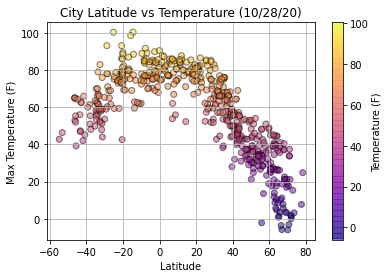

In [10]:
plt.scatter(clean_city_df['Latitude'],
            clean_city_df['Max Temp'],
            c=clean_city_df['Max Temp'],
            cmap = 'plasma',
            alpha=0.5,
            edgecolors='black')
plt.grid()
plt.colorbar().set_label('Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Temperature ({today.strftime("%m/%d/%y")})')
plt.show()

## Latitude vs. Humidity Plot

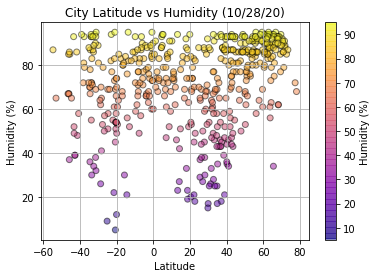

In [11]:
plt.scatter(clean_city_df['Latitude'],
            clean_city_df['Humidity'],
            c=clean_city_df['Humidity'],
            cmap = 'plasma',
            alpha=0.5,
            edgecolors='black')
plt.grid()
plt.colorbar().set_label('Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({today.strftime("%m/%d/%y")})')
plt.show()

## Latitude vs. Cloudiness Plot

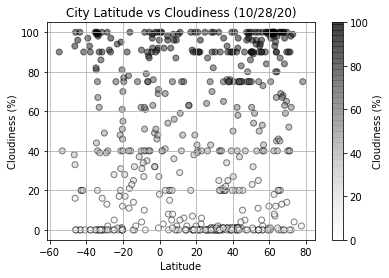

In [12]:
plt.scatter(clean_city_df['Latitude'],
            clean_city_df['Cloudiness'],
            c=clean_city_df['Cloudiness'],
            cmap = 'Greys',
            alpha=0.5,
            edgecolors='black')
plt.grid()
plt.colorbar().set_label('Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({today.strftime("%m/%d/%y")})')
plt.show()

## Latitude vs. Wind Speed Plot

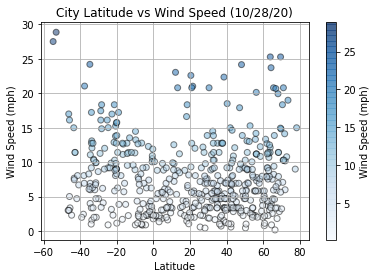

In [13]:
plt.scatter(clean_city_df['Latitude'],
            clean_city_df['Wind Speed'],
            c=clean_city_df['Wind Speed'],
            cmap = 'Blues',
            alpha=0.5,
            edgecolors='black')
plt.grid()
plt.colorbar().set_label('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({today.strftime("%m/%d/%y")})')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8806053485905555


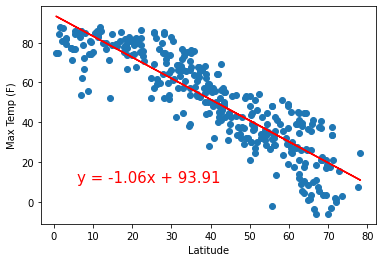

In [14]:
# Create Data Frame for Northern Hemisphere
north_df = pd.DataFrame([row for i, row in clean_city_df.iterrows() if row['Latitude'] >= 0])

# Find linear regression values
slope, intercept, r_value, p_value, std_err = linregress(north_df['Latitude'],north_df['Max Temp'])
regress_values = north_df['Latitude'] * slope + intercept
print(f'The r-value is: {r_value}')

# Create Graph
plt.scatter(north_df['Latitude'],north_df['Max Temp'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(6,10),fontsize=15,color="red")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6661687936207636


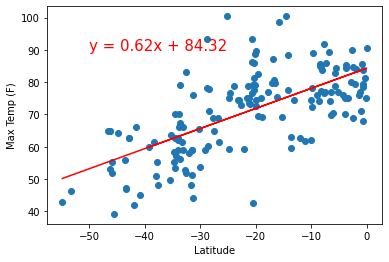

In [15]:
# Create Data Frame for Southern Hemisphere
south_df = pd.DataFrame([row for i, row in clean_city_df.iterrows() if row['Latitude'] <= 0])

# Find linear regression values
slope, intercept, r_value, p_value, std_err = linregress(south_df['Latitude'],south_df['Max Temp'])
regress_values = south_df['Latitude'] * slope + intercept
print(f'The r-value is: {r_value}')

# Create Graph
plt.scatter(south_df['Latitude'],south_df['Max Temp'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(-50,90),fontsize=15,color="red")
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33790586173551196


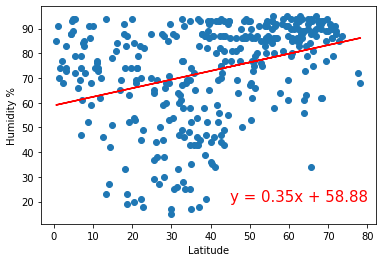

In [16]:
# Find linear regression values
slope, intercept, r_value, p_value, std_err = linregress(north_df['Latitude'],north_df['Humidity'])
regress_values = north_df['Latitude'] * slope + intercept
print(f'The r-value is: {r_value}')

# Create Graph
plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(45,20),fontsize=15,color="red")
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11994928343568173


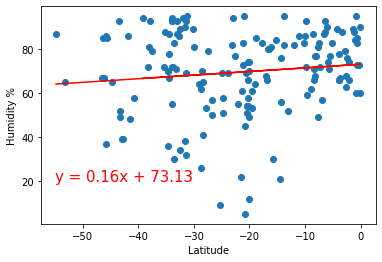

In [17]:
# Find linear regression values
slope, intercept, r_value, p_value, std_err = linregress(south_df['Latitude'],south_df['Humidity'])
regress_values = south_df['Latitude'] * slope + intercept
print(f'The r-value is: {r_value}')

# Create Graph
plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(-55,20),fontsize=15,color="red")
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1900788557848222


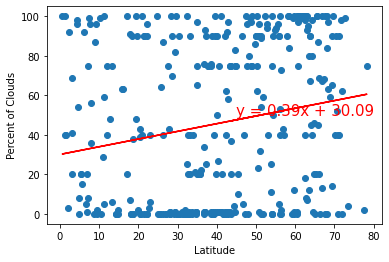

In [18]:
# Find linear regression values
slope, intercept, r_value, p_value, std_err = linregress(north_df['Latitude'],north_df['Cloudiness'])
regress_values = north_df['Latitude'] * slope + intercept
print(f'The r-value is: {r_value}')

# Create Graph
plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(45,50),fontsize=15,color="red")
plt.ylabel('Percent of Clouds')
plt.xlabel('Latitude')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11821272924589606


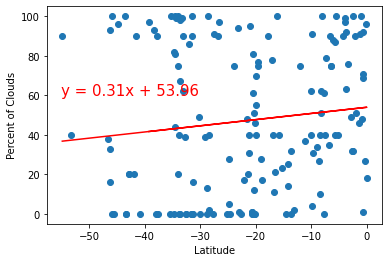

In [19]:
# Find linear regression values
slope, intercept, r_value, p_value, std_err = linregress(south_df['Latitude'],south_df['Cloudiness'])
regress_values = south_df['Latitude'] * slope + intercept
print(f'The r-value is: {r_value}')

# Create Graph
plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(-55,60),fontsize=15,color="red")
plt.ylabel('Percent of Clouds')
plt.xlabel('Latitude')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1837198003653363


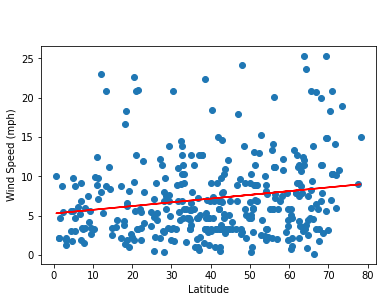

In [20]:
# Find linear regression values
slope, intercept, r_value, p_value, std_err = linregress(north_df['Latitude'],north_df['Wind Speed'])
regress_values = north_df['Latitude'] * slope + intercept
print(f'The r-value is: {r_value}')

# Create Graph
plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(10,30),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2688837444271907


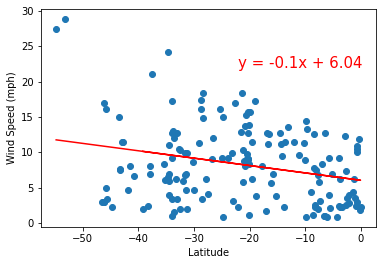

In [21]:
# Find linear regression values
slope, intercept, r_value, p_value, std_err = linregress(south_df['Latitude'],south_df['Wind Speed'])
regress_values = south_df['Latitude'] * slope + intercept
print(f'The r-value is: {r_value}')

# Create Graph
plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}',(-22,22),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()
